In [1]:
!pip -q install pandas_dq

In [2]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_dq import dq_report

from sklearn.preprocessing import StandardScaler

from  xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV

from itertools import combinations

from sklearn.decomposition import PCA


# Options

In [3]:
pd.set_option('display.max_columns', None)

warnings.filterwarnings('ignore', category=FutureWarning)

# Exploratory Data Analysis 

In [4]:
df = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\CourseProjects\EDA_Breast_Cancer\breast-cancer.csv')

df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
print('Number of records: ', df.shape[0],
      '\nNumber of columns: ', df.shape[1])

Number of records:  569 
Number of columns:  32


In [6]:
df.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

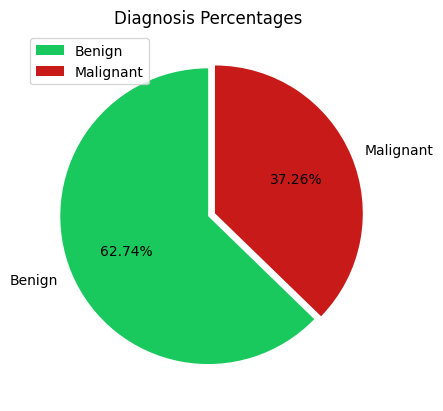

In [7]:
classes_count = df['diagnosis'].value_counts(normalize=True)*100
classes_count = classes_count.rename(index={'B': 'Benign', 'M': 'Malignant'})

import matplotlib.pyplot as plt
plt.pie(classes_count, labels=classes_count.index, autopct='%1.2f%%',
        startangle=90, colors=['#1ac95d', '#c91a1a'], explode=(0, 0.05))
plt.title('Diagnosis Percentages')
plt.legend()
plt.show()

# Data insights using pandas_dq

In [8]:
Suggestions = dq_report(df)
Suggestions

This is a summary report. Change verbose to 1 to see more details on each DQ issue.
    All variables classified into correct types.


,DQ Issue
The Good News,"There are no duplicate rows in this dataset, There are no duplicate columns in this datatset, There are no zero-variance or low information columns in the dataset., There are no date-time vars in this dataset, There are no columns with missing values in the dataset, There are no categorical columns with rare categories (< 1 percent) in this dataset, There are no columns with infinite values in this dataset , There are no columns with mixed (more than one) dataypes in this dataset, There are no high cardinality columns in this dataset, There is no target given. Hence no target leakage columns detected in the dataset"
The Bad News,"There are ID columns in the dataset. Remove them before modeling using Fix_DQ., There are 30 numerical columns, some with outliers. Remove them or use robust statistics., There are 17 columns with >= 0.8 correlation in the dataset. Drop one of them or use dimensionality reduction techniques."


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.0,100,8670.0,911320502.0,Possible ID column: drop before modeling step.
diagnosis,object,0.0,0,,,No issue
radius_mean,float64,0.0,NA,6.981,28.11,Column has 14 outliers greater than upper bound (21.90) or lower than lower bound(5.58). Cap them or remove them.
texture_mean,float64,0.0,NA,9.71,39.28,Column has 7 outliers greater than upper bound (30.24) or lower than lower bound(7.73). Cap them or remove them.
perimeter_mean,float64,0.0,NA,43.79,188.5,"Column has 13 outliers greater than upper bound (147.49) or lower than lower bound(31.78). Cap them or remove them., Column has a high correlation with ['radius_mean']. Consider dropping one of them."
area_mean,float64,0.0,NA,143.5,2501.0,"Column has 25 outliers greater than upper bound (1326.30) or lower than lower bound(-123.30). Cap them or remove them., Column has a high correlation with ['radius_mean', 'perimeter_mean']. Consider dropping one of them."
smoothness_mean,float64,0.0,NA,0.05263,0.1634,Column has 6 outliers greater than upper bound (0.13) or lower than lower bound(0.06). Cap them or remove them.
compactness_mean,float64,0.0,NA,0.01938,0.3454,Column has 16 outliers greater than upper bound (0.23) or lower than lower bound(-0.03). Cap them or remove them.
concavity_mean,float64,0.0,NA,0.0,0.4268,"Column has 18 outliers greater than upper bound (0.28) or lower than lower bound(-0.12). Cap them or remove them., Column has a high correlation with ['compactness_mean']. Consider dropping one of them."
concave points_mean,float64,0.0,NA,0.0,0.2012,"Column has 10 outliers greater than upper bound (0.15) or lower than lower bound(-0.06). Cap them or remove them., Column has a high correlation with ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean']. Consider dropping one of them."


# Preprocessing

In [9]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df = df.drop(columns=['id'])

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Feature engineering

In [11]:
list_of_features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal_dimension']
count = 0

for feature in list_of_features:
    df[f'avg_{feature}'] = (df[f'{feature}_mean'] + df[f'{feature}_se'] + df[f'{feature}_worst'])
    count += 1

print(f'{count} features were created!')

print('The new shape of the dataframe: ', df.shape)


10 features were created!
The new shape of the dataframe:  (569, 41)


In [12]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,avg_radius,avg_texture,avg_perimeter,avg_area,avg_smoothness,avg_compactness,avg_concavity,avg_concave points,avg_symmetry,avg_fractal_dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,44.4650,28.6153,315.989,3173.40,0.286999,0.99224,1.06573,0.42837,0.73203,0.203803
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,46.1035,41.9139,295.098,3356.08,0.213765,0.27832,0.34710,0.26957,0.47009,0.149222
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,44.0056,47.5669,287.085,3006.03,0.260150,0.62446,0.68612,0.39148,0.59070,0.152141
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,26.8256,48.0360,179.895,981.03,0.361410,1.22478,0.98491,0.38137,0.98313,0.279648
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,43.5872,31.7913,292.738,2966.44,0.249190,0.36241,0.65488,0.28565,0.43486,0.140725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,48.1860,50.0460,315.773,3664.70,0.262300,0.35611,0.70658,0.38504,0.38974,0.131619
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,44.5855,68.9630,291.403,3091.04,0.220169,0.31983,0.50500,0.27749,0.45138,0.124198
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,36.0364,63.2750,238.425,2030.65,0.204353,0.44901,0.48011,0.21039,0.39398,0.138572
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,47.0660,70.3450,330.472,3172.22,0.289322,1.20668,1.36127,0.43364,0.67164,0.200345


In [13]:
max_iter = 20

count = 0

features = df.drop(columns=['diagnosis']).columns

for i, (feat1, feat2) in enumerate(combinations(features, 2), start=1):
    new_feature_name = f'{feat1}_x_{feat2}'
    df[new_feature_name] = df[feat1] * df[feat2]

    count += 1

    if count == max_iter:
        break

print('The new shape of the dataframe: ', df.shape)

The new shape of the dataframe:  (569, 61)


In [14]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,avg_radius,avg_texture,avg_perimeter,avg_area,avg_smoothness,avg_compactness,avg_concavity,avg_concave points,avg_symmetry,avg_fractal_dimension,radius_mean_x_texture_mean,radius_mean_x_perimeter_mean,radius_mean_x_area_mean,radius_mean_x_smoothness_mean,radius_mean_x_compactness_mean,radius_mean_x_concavity_mean,radius_mean_x_concave points_mean,radius_mean_x_symmetry_mean,radius_mean_x_fractal_dimension_mean,radius_mean_x_radius_se,radius_mean_x_texture_se,radius_mean_x_perimeter_se,radius_mean_x_area_se,radius_mean_x_smoothness_se,radius_mean_x_compactness_se,radius_mean_x_concavity_se,radius_mean_x_concave points_se,radius_mean_x_symmetry_se,radius_mean_x_fractal_dimension_se,radius_mean_x_radius_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,44.4650,28.6153,315.989,3173.40,0.286999,0.99224,1.06573,0.42837,0.73203,0.203803,186.7362,2209.1720,18007.990,2.130016,4.994024,5.398799,2.646329,4.351781,1.415993,19.699050,16.286347,154.51611,2759.6660,0.115118,0.882230,0.966603,0.285501,0.540240,0.111412,456.58620
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,46.1035,41.9139,295.098,3356.08,0.213765,0.27832,0.34710,0.26957,0.47009,0.149222,365.5289,2733.7530,27275.820,1.743102,1.617625,1.787533,1.443397,3.727284,1.165702,11.179795,15.096323,69.89686,1523.8256,0.107478,0.269056,0.382602,0.275638,0.285717,0.072653,514.04430
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,44.0056,47.5669,287.085,3006.03,0.260150,0.62446,0.68612,0.39148,0.59070,0.152141,418.4125,2559.7000,23687.070,2.158024,3.148431,3.886806,2.518351,4.073861,1.181203,14.680864,15.494061,90.27865,1851.4507,0.121094,0.788781,0.754521,0.405220,0.443025,0.090003,464.09330
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,26.8256,48.0360,179.895,981.03,0.361410,1.22478,0.98491,0.38137,0.98313,0.279648,232.7396,885.9636,4409.262,1.627350,3.242138,2.756788,1.201384,2.965774,1.112765,5.659752,13.201520,39.34190,310.9666,0.104036,0.851704,0.646486,0.213211,0.680975,0.105155,170.27220
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,43.5872,31.7913,292.738,2966.44,0.249190,0.36241,0.65488,0.28565,0.43486,0.140725,290.9586,2741.1790,26316.130,2.035087,2.694512,4.017420,2.116247,3.670461,1.193661,15.363588,15.852577,110.33702,1916.1876,0.233132,0.499337,1.154095,0.382466,0.356292,0.103783,457.33660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010

# Correlation

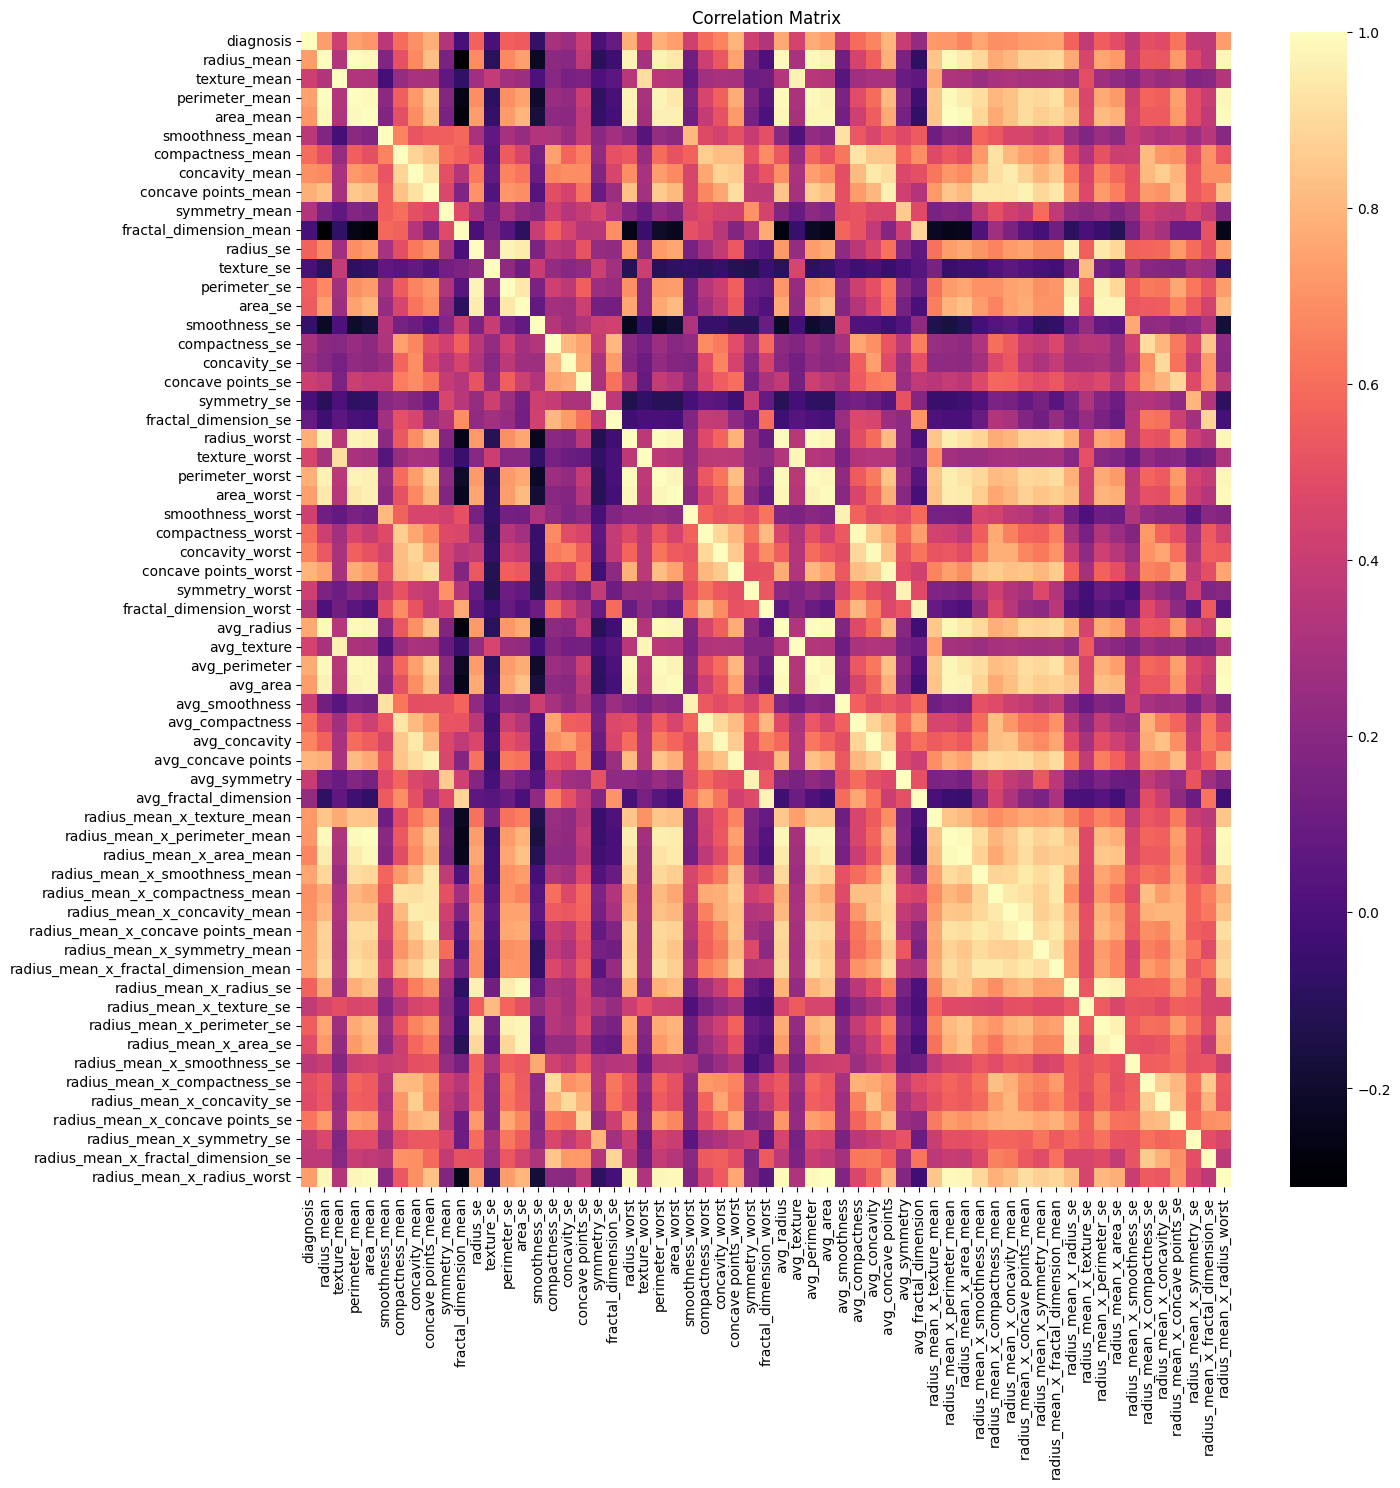

In [15]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(corr_matrix, cmap='magma', annot=False)

plt.title('Correlation Matrix')
plt.show()

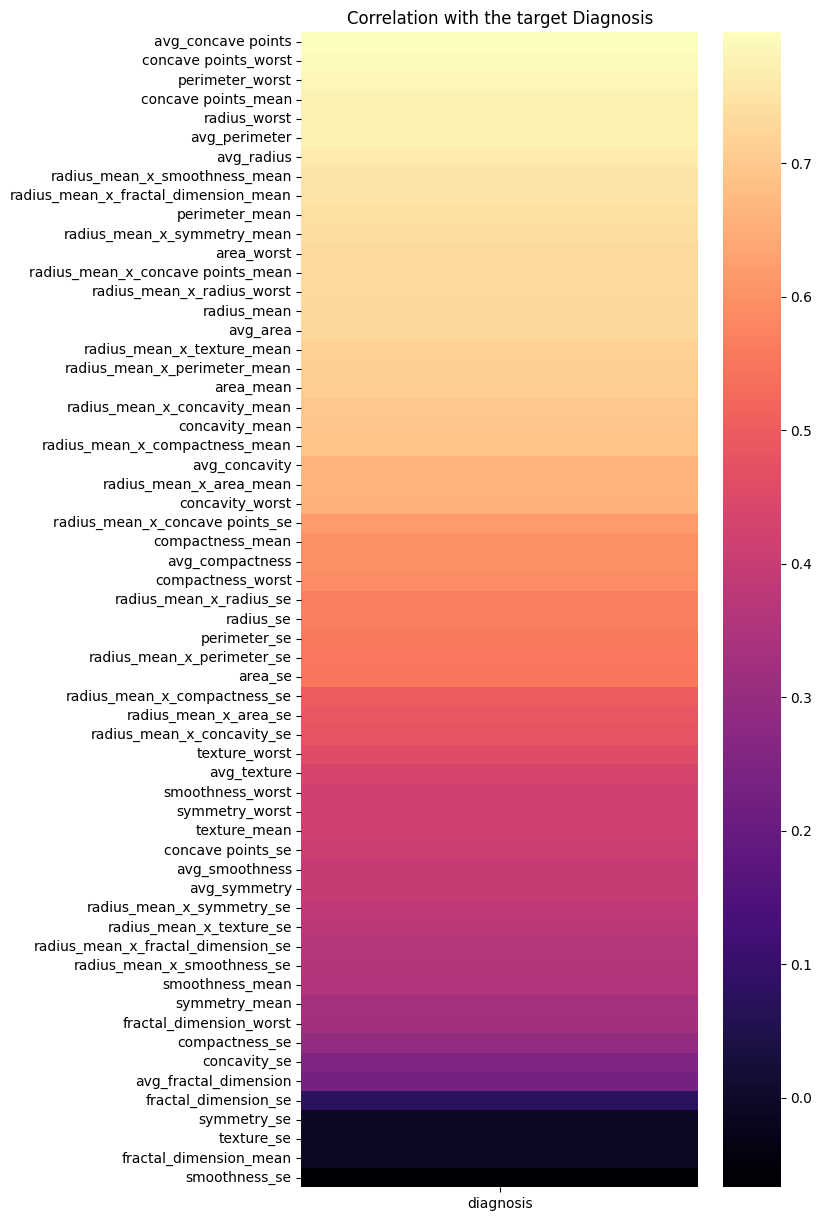

In [16]:
corr_matrix = corr_matrix['diagnosis'].drop('diagnosis')

corr_matrix = corr_matrix.sort_values(ascending=False)

plt.figure(figsize=(6.4, 15))

sns.heatmap(corr_matrix.to_frame(), cmap='magma', annot=False)

plt.title('Correlation with the target Diagnosis')
plt.show()

# Modeling

In [17]:
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=7, test_size=0.1)

In [18]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

pca = PCA(n_components=0.95)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

print('Number of records: ', x_train_pca.shape[0],
      '\nNumber of columns: ', x_train_pca.shape[1])

Number of records:  512 
Number of columns:  10


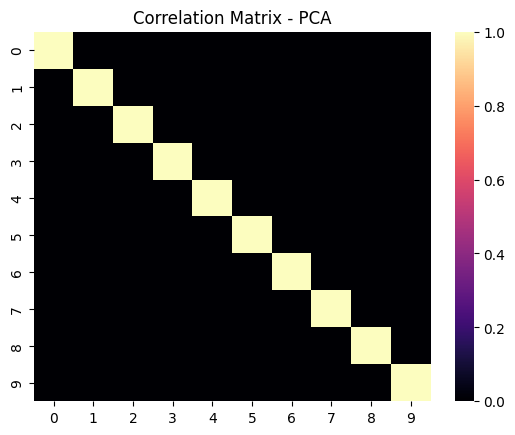

In [19]:
n_df = pd.DataFrame(x_train_pca)
corr_matrix = n_df.corr()

sns.heatmap(corr_matrix, cmap='magma', annot=False)

plt.title('Correlation Matrix - PCA')
plt.show()

# Decision tree

In [20]:
pca = PCA(n_components=0.95)
x_train_pca95 = pca.fit_transform(x_train_scaled)
x_test_pca95 = pca.transform(x_test_scaled)

param_grid_DT = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1, 2, 5]
}

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)

def build_DT_model(parameters, cv, x_train_pca, x_test_pca):
    model = DecisionTreeClassifier(random_state=7)

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid_DT, cv=skf, scoring='accuracy', n_jobs=-1)

    grid_search.fit(x_train_pca, y_train)

    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test_pca)

    print("\nClassification Report on Test Set: ")
    print(classification_report(y_test, y_pred))

    build_DT_model(param_grid_DT, skf, x_train_pca95, x_test_pca95)

In [21]:
pca = PCA(n_components=0.99)
x_train_pca99 = pca.fit_transform(x_train_scaled)
x_test_pca99 = pca.transform(x_test_scaled)

build_DT_model(param_grid_DT, skf, x_train_pca99, x_test_pca99)

Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score:  0.939422084623323

Classification Report on Test Set: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.95      0.90      0.93        21

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57

Best Parameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.9374383671597294

Classification Report on Test Set: 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.90      0.86      0.88        21

    accuracy                           0.91        57
   macro avg       0.91      0.90      0.90        57
weighted avg       0.91      0.91      0.91        57

Best Parameters:  {'max_depth': 3, 'min_sampl

c:\Users\ASUS\anaconda3\envs\mynewenv\Lib\site-packages\joblib\externals\loky\initializers.py:28: UserWarning: Unable to introspect viztracer state: maximum recursion depth exceeded


RecursionError: maximum recursion depth exceeded

In [ ]:
pca = PCA(n_components=0.999)
x_train_pca999 = pca.fit_transform(x_train_scaled)
x_test_pca999 = pca.transform(x_test_scaled)

build_DT_model(param_grid_DT, skf, x_train_pca999, x_test_pca999)

# Random Forest

In [ ]:
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

def build_RF_model(parameters, cv, x_train_pca, x_test_pca):
    model = RandomForestClassifier(random_state=7)

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid_DT, cv=skf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train_pca, y_train)

    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test_pca)

    print('\nClassification Report on Test Set: ')
    print(classification_report(y_test, y_pred))

    build_RF_model(param_grid_RF, skf, x_train_pca95, x_test_pca95)

In [ ]:
build_RF_model(param_grid_RF, skf, x_train_pca99, x_test_pca99)

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score:  0.943343653250774

Classification Report on Test Set: 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        36
           1       0.86      0.90      0.88        21

    accuracy                           0.91        57
   macro avg       0.90      0.91      0.91        57
weighted avg       0.91      0.91      0.91        57

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.9472193555784886

Classification Report on Test Set: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.90      0.90      0.90        21

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57

Best Parameters:  {'max_depth': None, 'mi

KeyboardInterrupt: 

In [ ]:
build_RF_model(param_grid_RF, skf, x_train_pca99, x_test_pca999)